In [1]:
!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 30.4 MB/s eta 0:00:00 0:00:01

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [2]:
import pandas as pd
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer

nlp = spacy.load("es_core_news_sm")

In [4]:
def preprocesar(texto: str) -> str:
    doc = nlp(texto.lower())
    tokens_limpios = [
        token.lemma_
        for token in doc
        if not token.is_stop and token.is_alpha
    ]
    return " ".join(tokens_limpios)

df = pd.read_csv("../data/comentarios.csv")

df["comentario_procesado"] = df["texto_comentario"].apply(preprocesar)

# Vectorización con TF-IDF
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(df["comentario_procesado"])

In [5]:
print("Vocabulario:", vectorizer.get_feature_names_out())
print("\nMatriz TF-IDF (shape):", X_tfidf.shape)

# Mostrar como DataFrame
tfidf_df = pd.DataFrame(
    X_tfidf.toarray(),
    columns=vectorizer.get_feature_names_out()
)
print("\nMatriz TF-IDF:\n", tfidf_df)

Vocabulario: ['acción' 'agarre' 'agotar' 'agua' 'ajustado' 'alto' 'amigo' 'aplicación'
 'arrepientir' 'asombroso' 'atractivo' 'auricular' 'año' 'bajo' 'balón'
 'batería' 'bestia' 'bonito' 'básico' 'caber' 'calentar' 'calidad'
 'calzado' 'caminar' 'camiseta' 'cancelación' 'cierre' 'cocinar'
 'comodidad' 'compra' 'comprar' 'compraría' 'conexión' 'confuso'
 'contentar' 'contento' 'control' 'controlar' 'convencer' 'corto' 'costar'
 'costura' 'cumplir' 'cámara' 'cómodas' 'cómodo' 'decepcionar' 'dejar'
 'delgado' 'deporte' 'desarrollo' 'desconectar' 'desgastar' 'devolver'
 'diario' 'diseño' 'dudar' 'durabilidad' 'duradero' 'durar' 'duro'
 'ejercicio' 'elegant' 'elegante' 'encantar' 'encoger' 'enganchar'
 'entrenamiento' 'entretenido' 'escritura' 'escuchar' 'espacio' 'espaciós'
 'esperar' 'estilo' 'estético' 'excelente' 'expectativa' 'fascinado'
 'fascinante' 'feliz' 'fidelidad' 'fluido' 'foto' 'fresco' 'funcional'
 'funcionar' 'función' 'fácil' 'genial' 'gimnasio' 'grabar' 'grar'
 'gustar' '

/var/folders/sl/2x216nz107xcfzxlmr7tr47m0000gn/T/ipykernel_5429/3265052097.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="peso", y="palabra", data=df_top, palette="viridis")


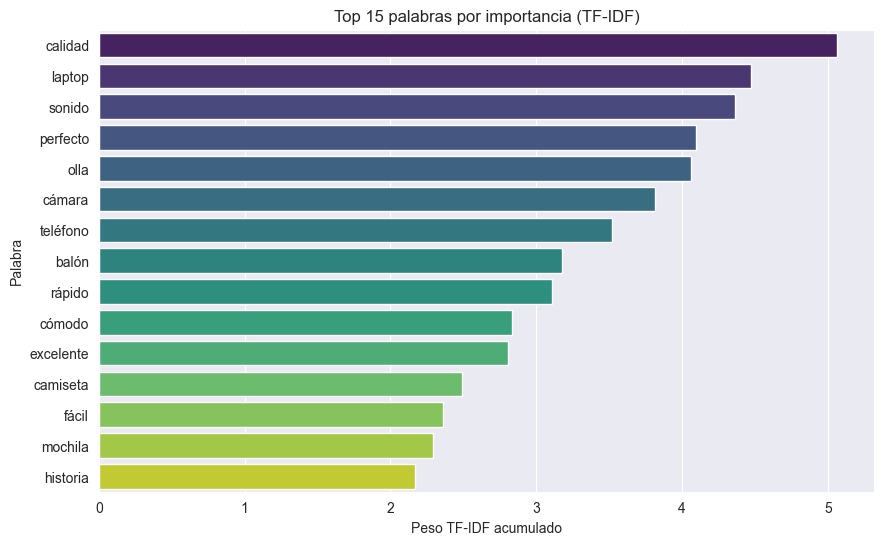

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sumar TF-IDF por término en todos los documentos
suma_tfidf = X_tfidf.toarray().sum(axis=0)
palabras = vectorizer.get_feature_names_out()
df_tfidf = pd.DataFrame({"palabra": palabras, "peso": suma_tfidf})

# Ordenar por importancia
top_n = 15
df_top = df_tfidf.sort_values("peso", ascending=False).head(top_n)

# Visualización
plt.figure(figsize=(10,6))
sns.barplot(x="peso", y="palabra", data=df_top, palette="viridis")
plt.title(f"Top {top_n} palabras por importancia (TF-IDF)")
plt.xlabel("Peso TF-IDF acumulado")
plt.ylabel("Palabra")
plt.show()